In [1]:
import matplotlib

In [2]:
import cv2
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import lsqr
import os

In [4]:
os.makedirs('results', exist_ok=True)

image_filenames = [
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\download.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\images.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img c.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image a.gif",
    "C:\\Users\\manasa\\Desktop\\simpleObjects.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img1.jpg",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image2.gif",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image3.gif"
]


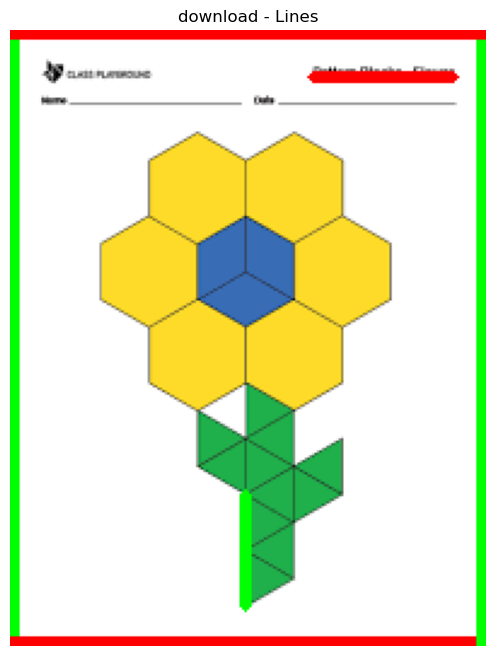

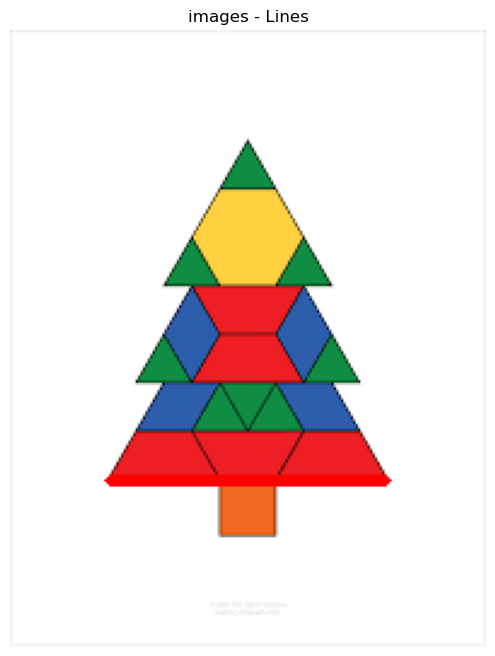

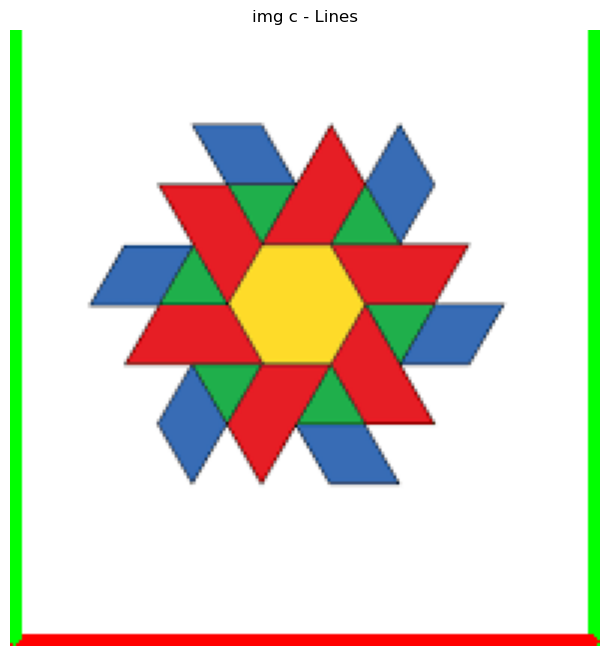

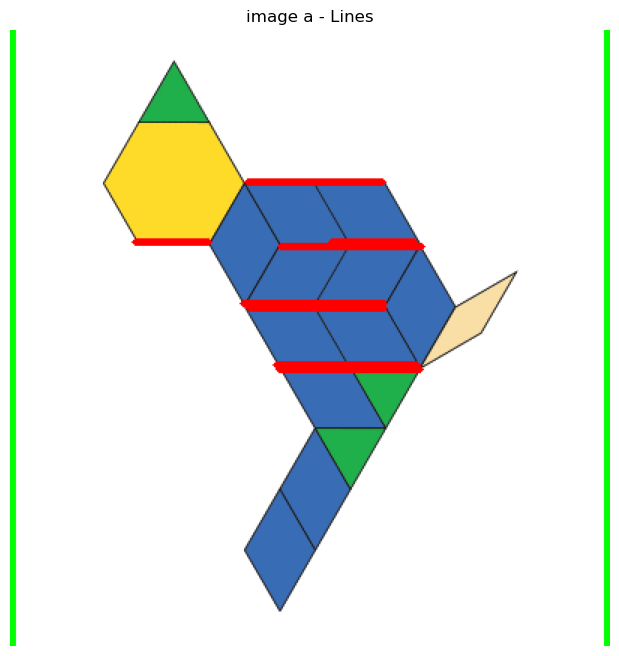

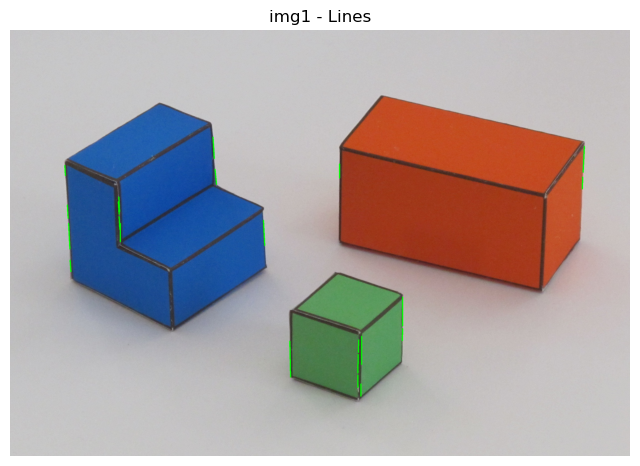

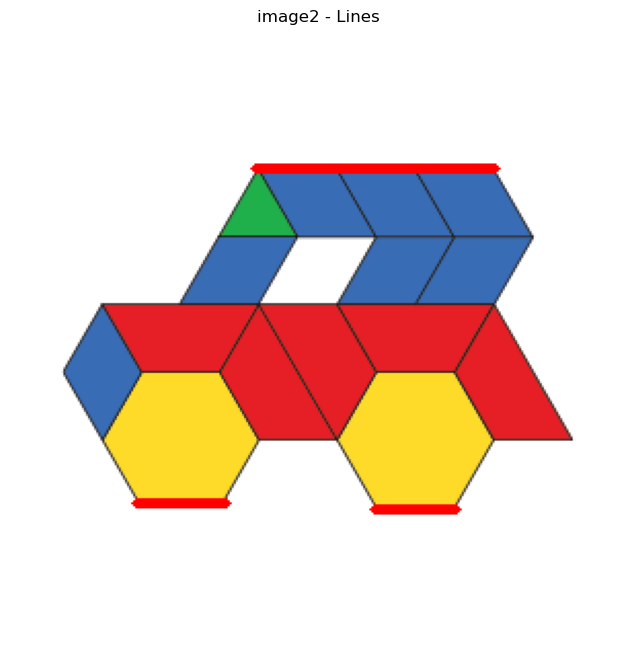

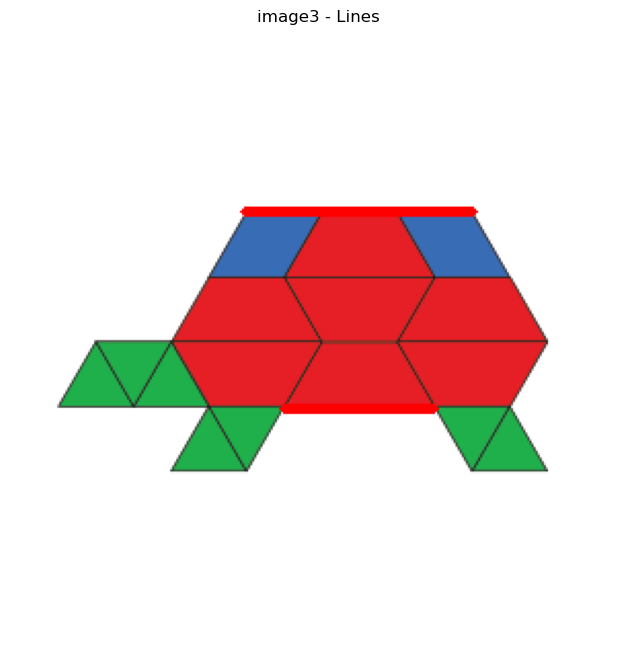

In [6]:
# Line Detection & Visualization
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]
    img = cv2.imread(image_filename)
    if img is None:
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    
    # Line detection
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Vertical lines
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Horizontal lines
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)

    # Save and display result
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    plt.figure(figsize=(8,8))
    plt.title(f"{basename} - Lines")
    plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


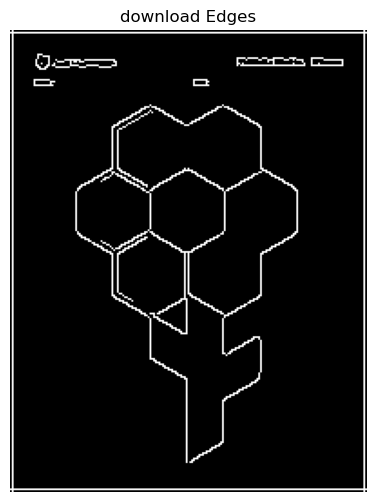

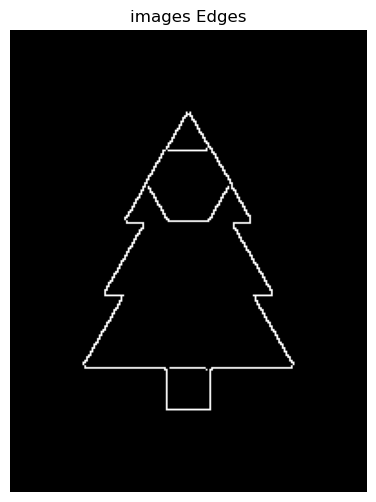

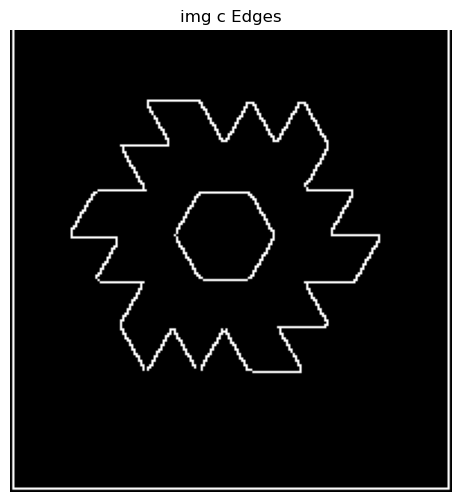

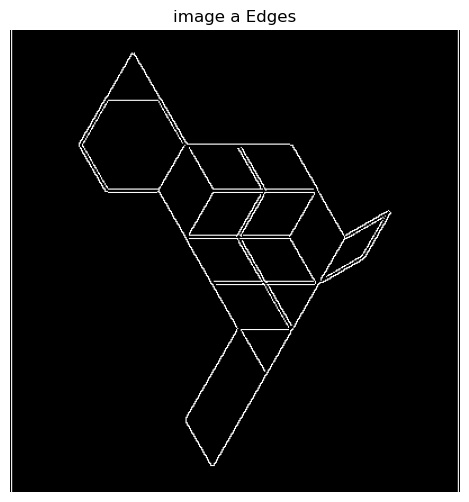

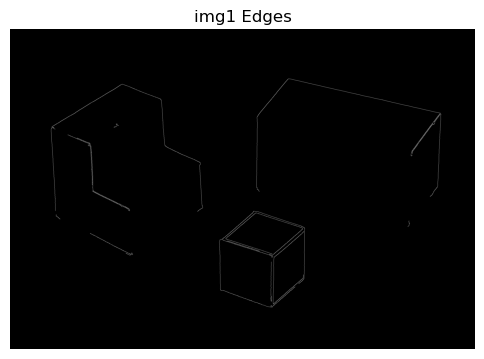

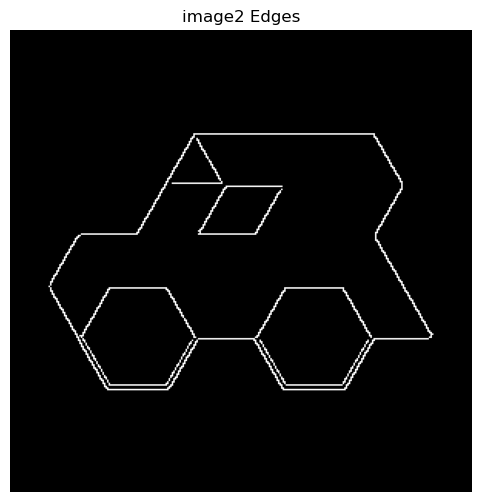

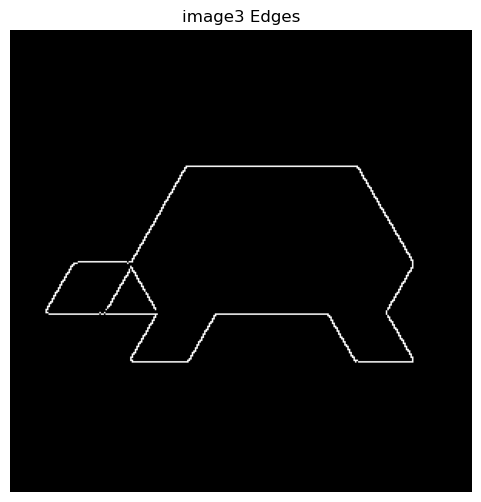

In [7]:
#Edge Detection
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]
    img = cv2.imread(image_filename)
    if img is None:
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    edges = cv2.Canny(blurred, 50, 150)
    cv2.imwrite(f'results/{basename}_edges.png', edges)

    plt.figure(figsize=(6,6))
    plt.title(f"{basename} Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()


In [8]:
# Simple World implementation
# Author: Manasa Maram
# Date: Nov 2025
# Description:
# Processes multiple block images: grayscale, blur, edge detection, and line classification.
# Saves results for each image in the 'results' folder. Extensively commented for clarity.

import cv2            # OpenCV for image processing
import numpy as np    # NumPy for numerical operations
import matplotlib.pyplot as plt  # For visualizing results
import os             # For file/directory management


In [10]:
# Ensure the results folder exists.
os.makedirs('results', exist_ok=True)

# List of Simple World implementation image file paths.
image_filenames = [
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\download.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\images.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img c.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image a.gif",
    "C:\\Users\\manasa\\Desktop\\simpleObjects.png",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\img1.jpg",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image2.gif",
    "C:\\Users\\manasa\\Desktop\\sem 3\\CV\\image3.gif"
]



In [11]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found

Could not read C:\Users\manasa\Desktop\simpleObjects.png


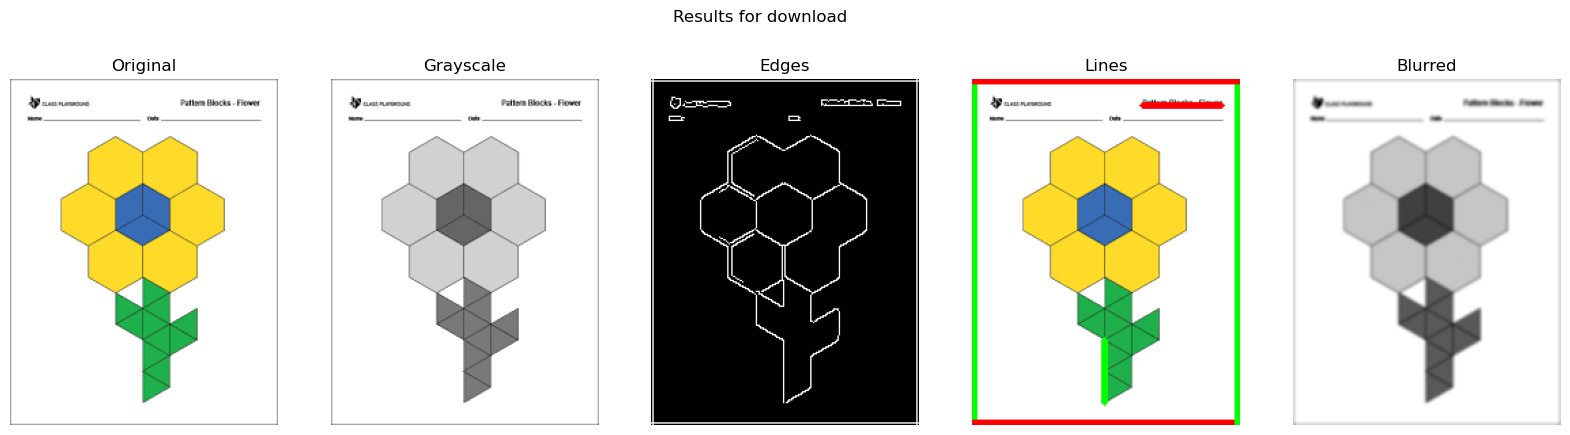

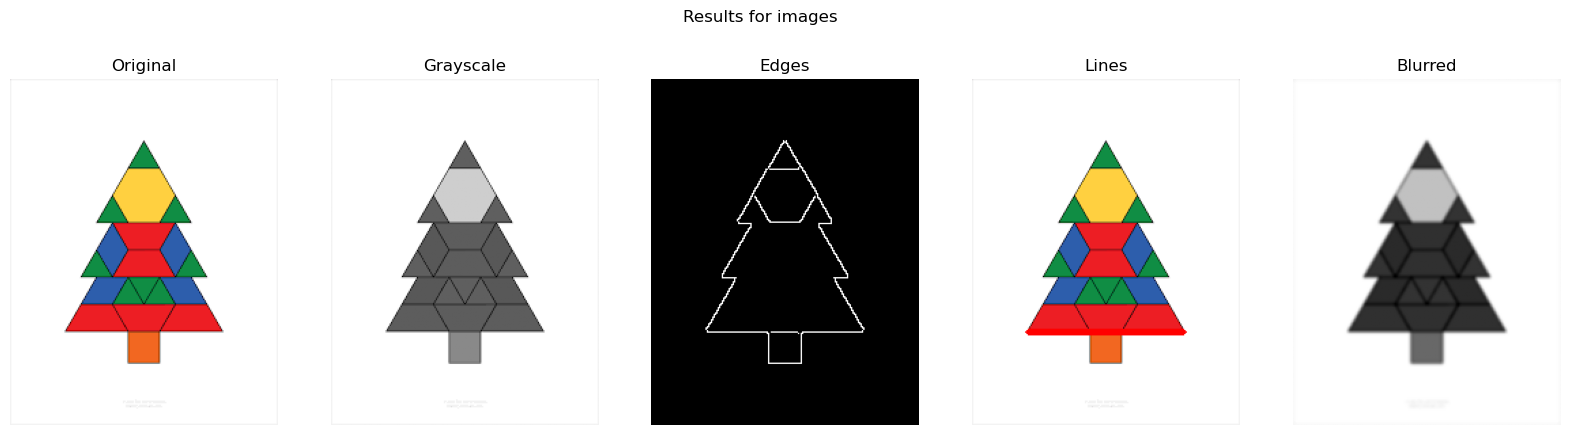

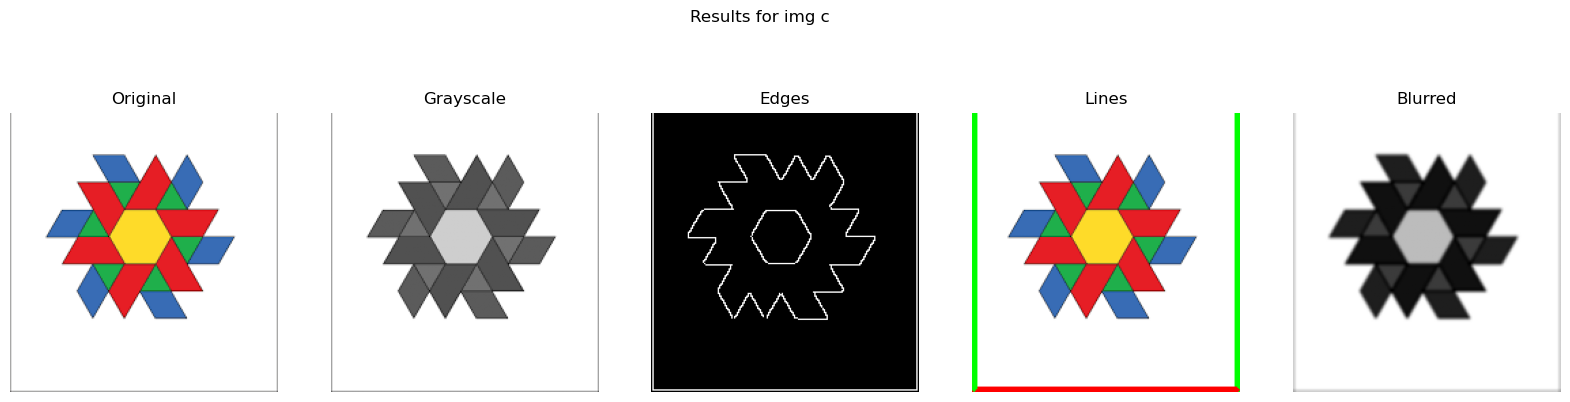

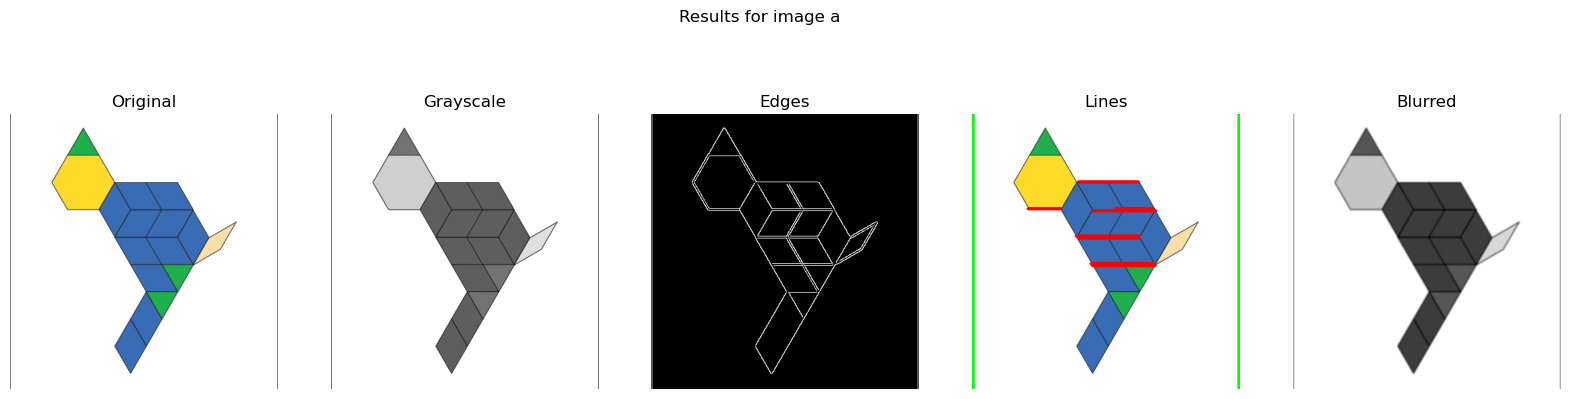

Could not read C:\Users\manasa\Desktop\simpleObjects.png


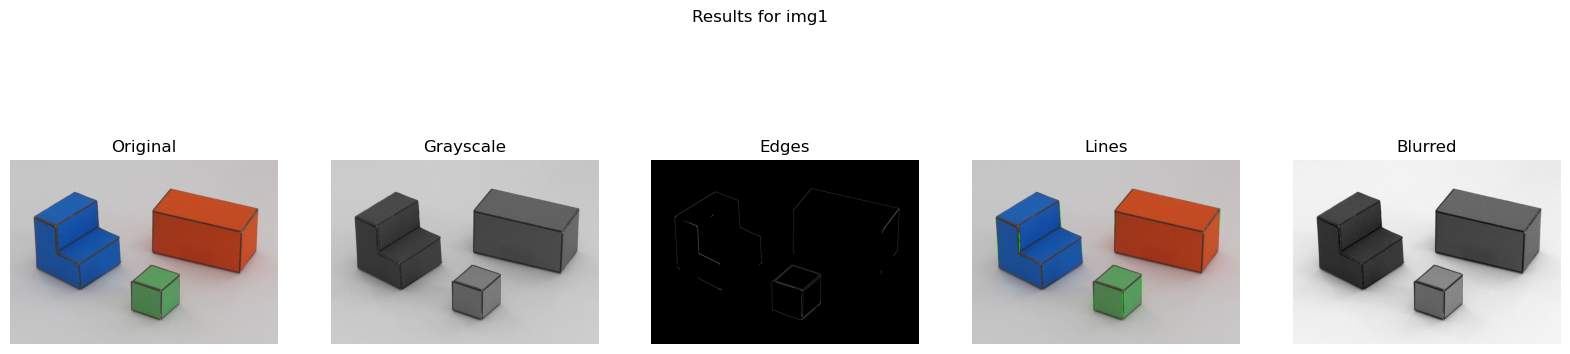

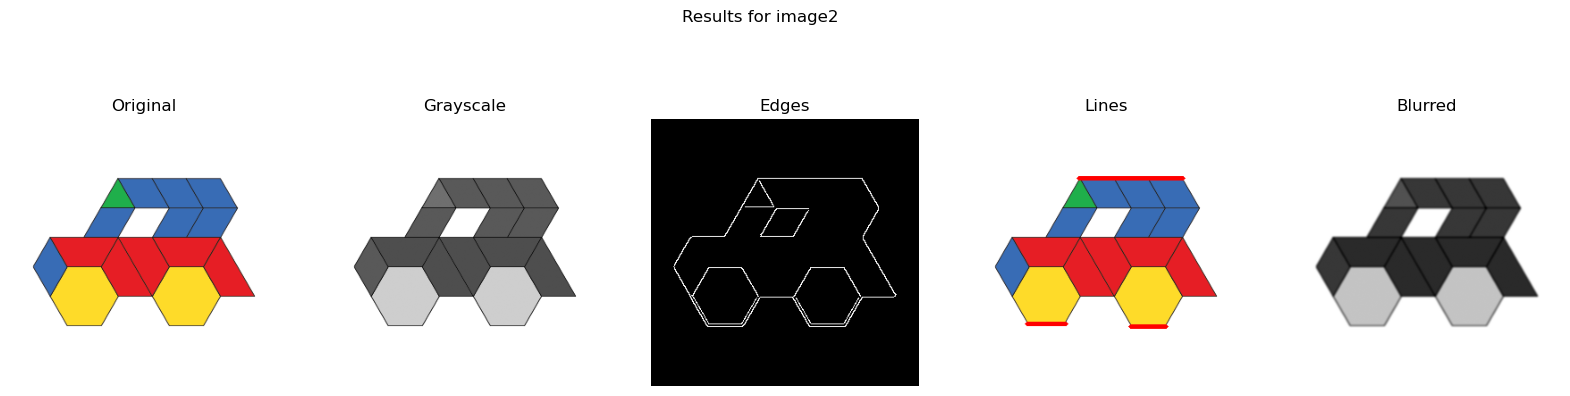

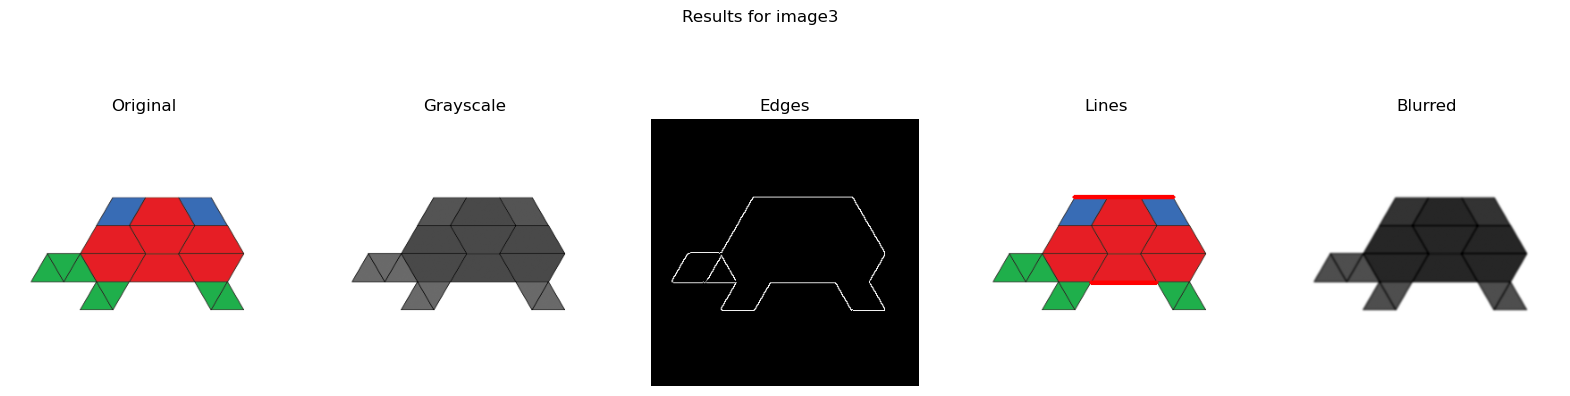

In [12]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply Gaussian blur to smooth image
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    
    # Step 3: Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Step 4: Line detection using Hough transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, 
                            minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Draw vertical lines in green
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Draw horizontal lines in red
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)
    
    # Step 5: Save all result images for the current image
    cv2.imwrite(f'results/{basename}_original.png', img)
    cv2.imwrite(f'results/{basename}_gray.png', gray)
    cv2.imwrite(f'results/{basename}_blurred.png', blurred)
    cv2.imwrite(f'results/{basename}_edges.png', edges)
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    
    # Step 6: Visualize results as a set of panels
    plt.figure(figsize=(20,5))
    plt.subplot(1,5,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,2); plt.title("Grayscale"); plt.imshow(gray, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,3); plt.title("Edges"); plt.imshow(edges, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,4); plt.title("Lines"); plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,5); plt.title("Blurred"); plt.imshow(blurred, cmap='gray'); plt.axis('off')
    plt.suptitle(f"Results for {basename}")
    plt.show()

# End of script. Each image result is saved and visualized. See README for how to run.


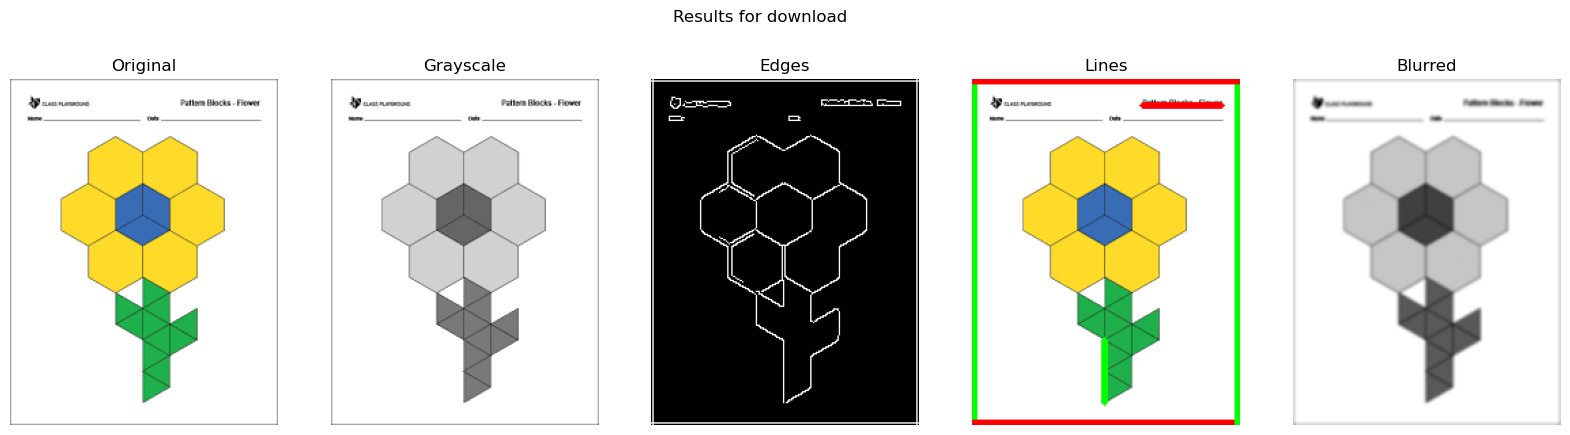

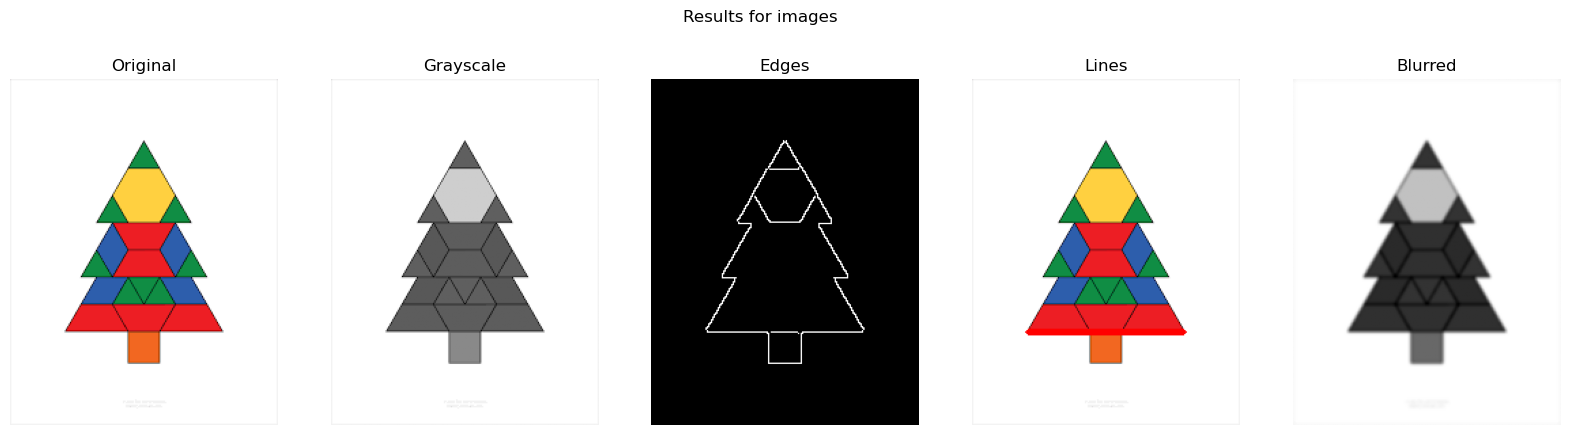

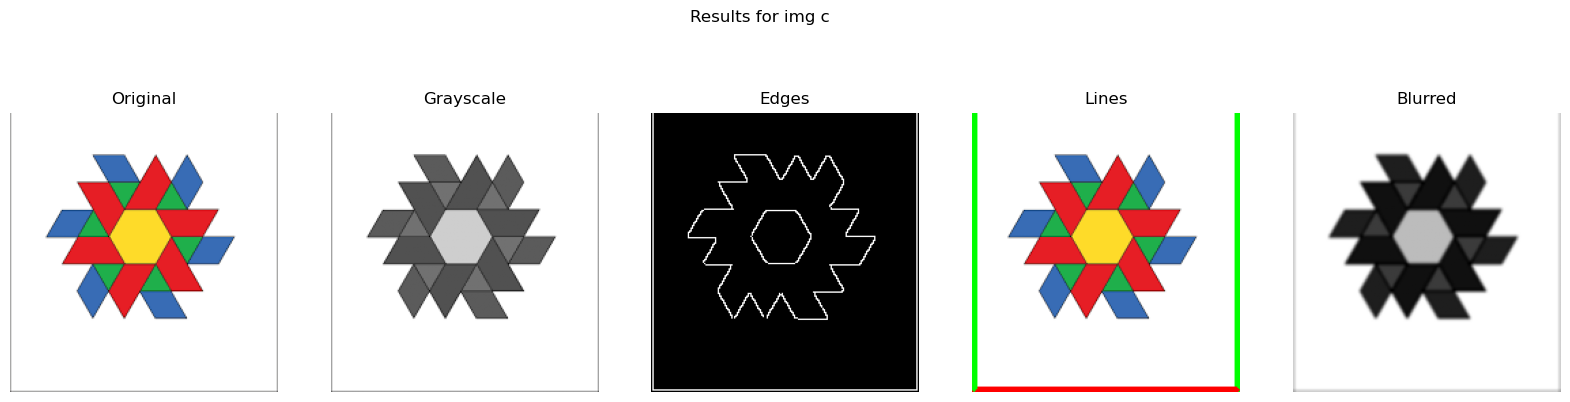

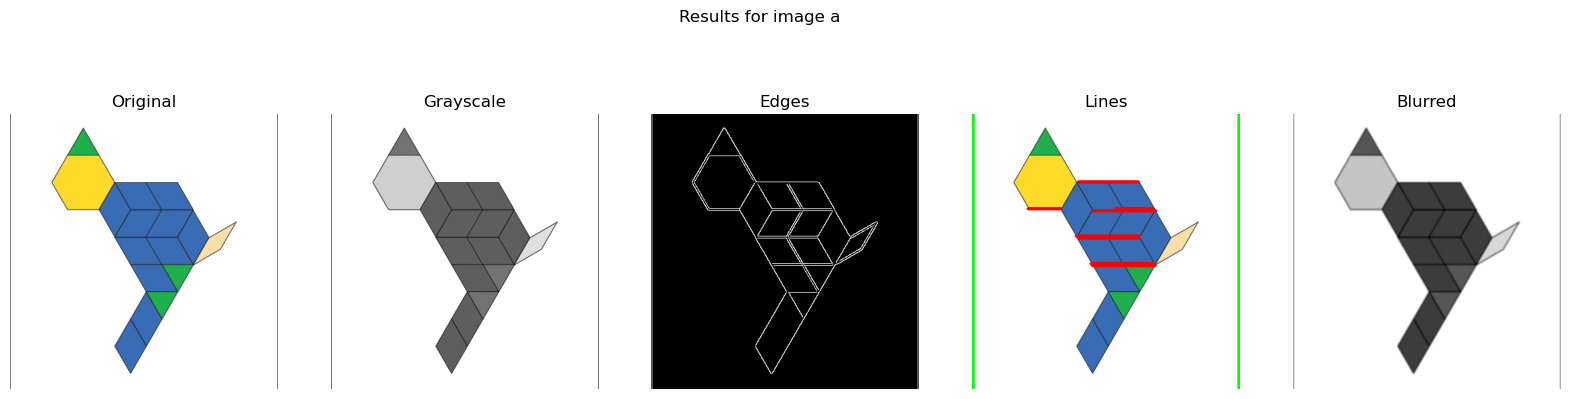

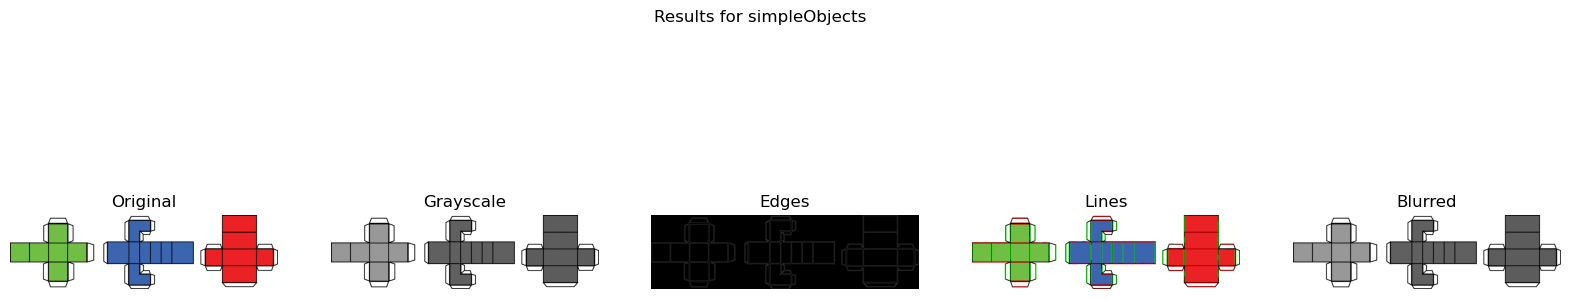

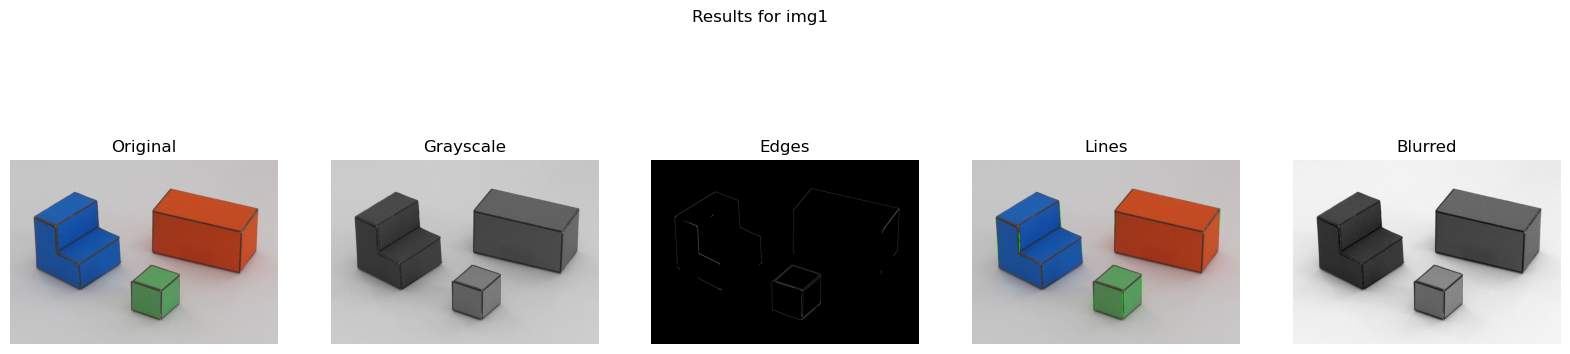

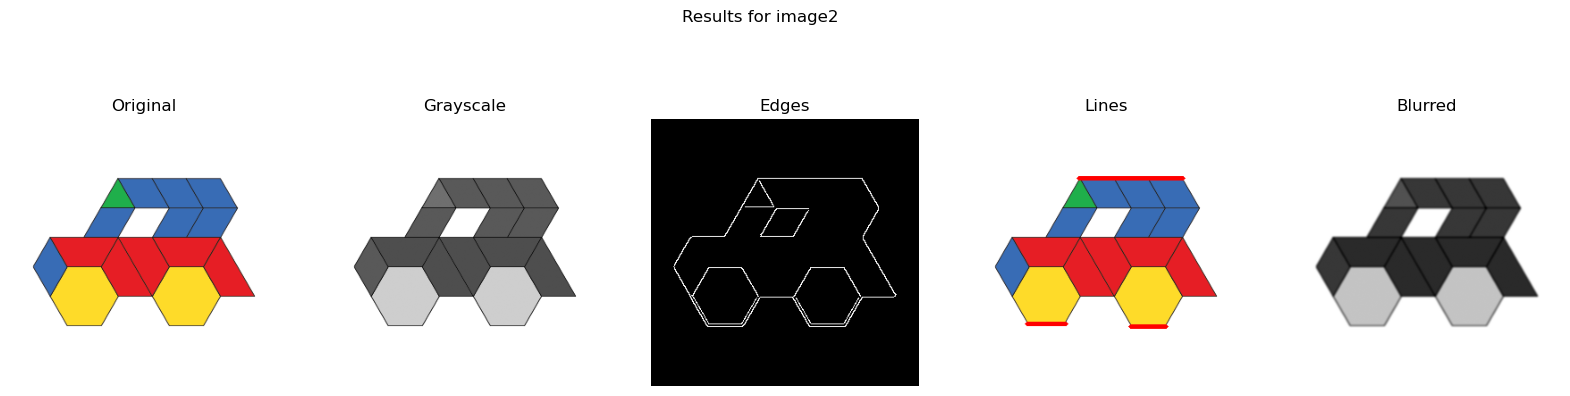

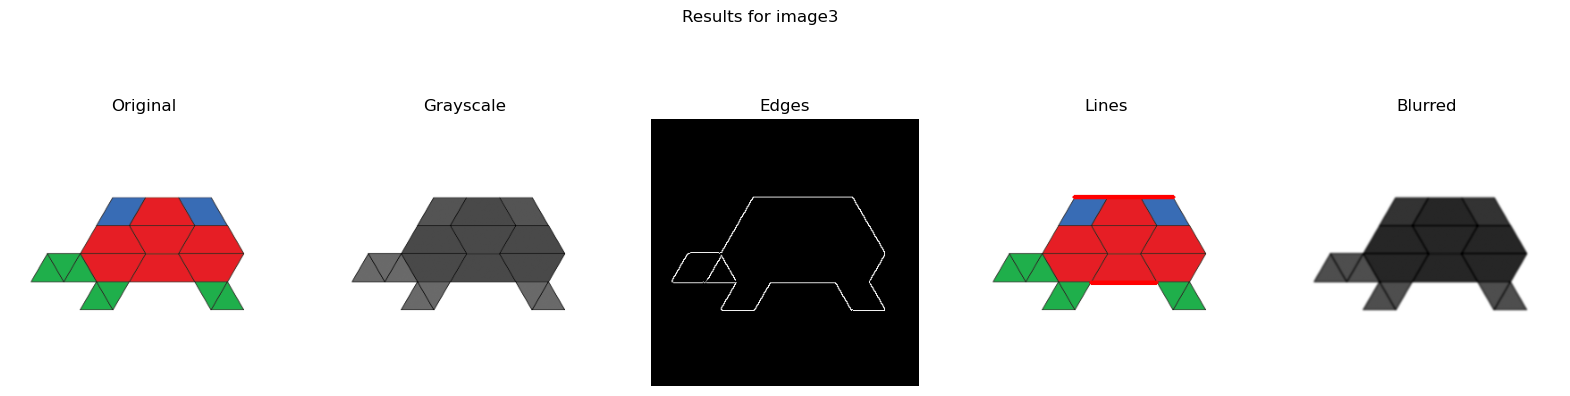

In [48]:
# Loop through each image for full processing:
for image_filename in image_filenames:
    basename = os.path.splitext(os.path.basename(image_filename))[0]  # Get image name for output files
    
    # Load image from file
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip to next image if not found
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply Gaussian blur to smooth image
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    
    # Step 3: Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Step 4: Line detection using Hough transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, 
                            minLineLength=40, maxLineGap=5)
    img_lines = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2-y1, x2-x1))
            # Draw vertical lines in green
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,255,0), 3)
            # Draw horizontal lines in red
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0,0,255), 3)
    
    # Step 5: Save all result images for the current image
    cv2.imwrite(f'results/{basename}_original.png', img)
    cv2.imwrite(f'results/{basename}_gray.png', gray)
    cv2.imwrite(f'results/{basename}_blurred.png', blurred)
    cv2.imwrite(f'results/{basename}_edges.png', edges)
    cv2.imwrite(f'results/{basename}_lines.png', img_lines)
    
    # Step 6: Visualize results as a set of panels
    plt.figure(figsize=(20,5))
    plt.subplot(1,5,1); plt.title("Original"); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,2); plt.title("Grayscale"); plt.imshow(gray, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,3); plt.title("Edges"); plt.imshow(edges, cmap='gray'); plt.axis('off')
    plt.subplot(1,5,4); plt.title("Lines"); plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,5,5); plt.title("Blurred"); plt.imshow(blurred, cmap='gray'); plt.axis('off')
    plt.suptitle(f"Results for {basename}")
    plt.show()

# End of script. Each image result is saved and visualized. See README for how to run.


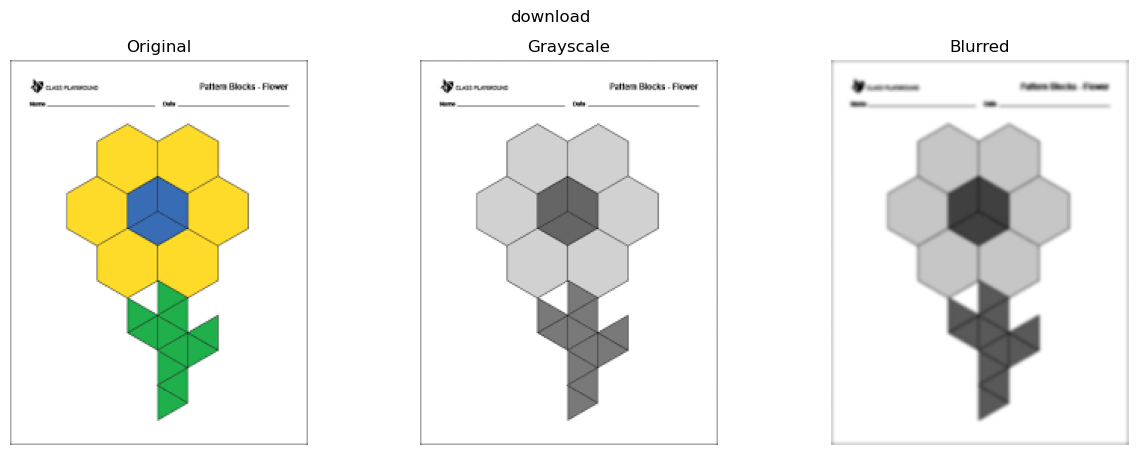

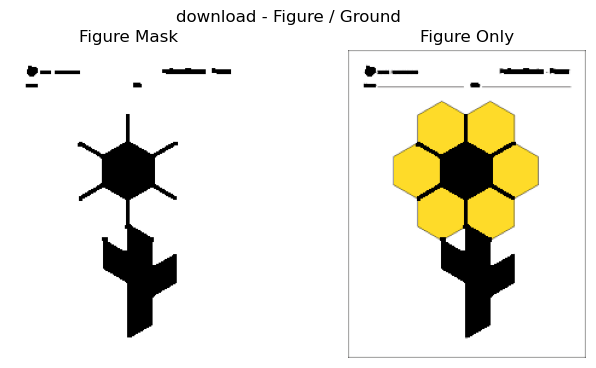

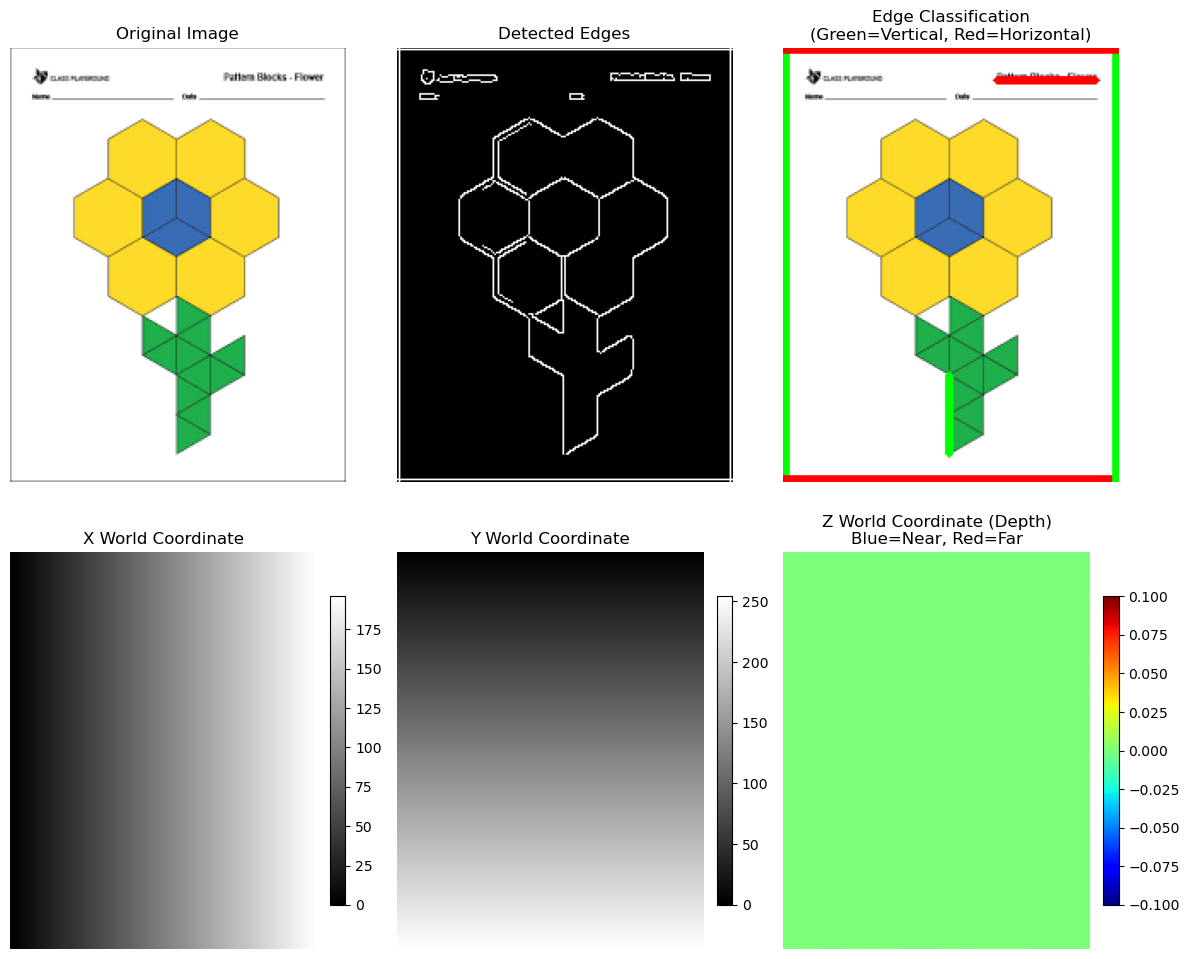

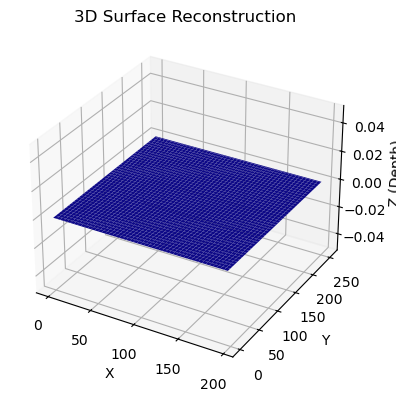

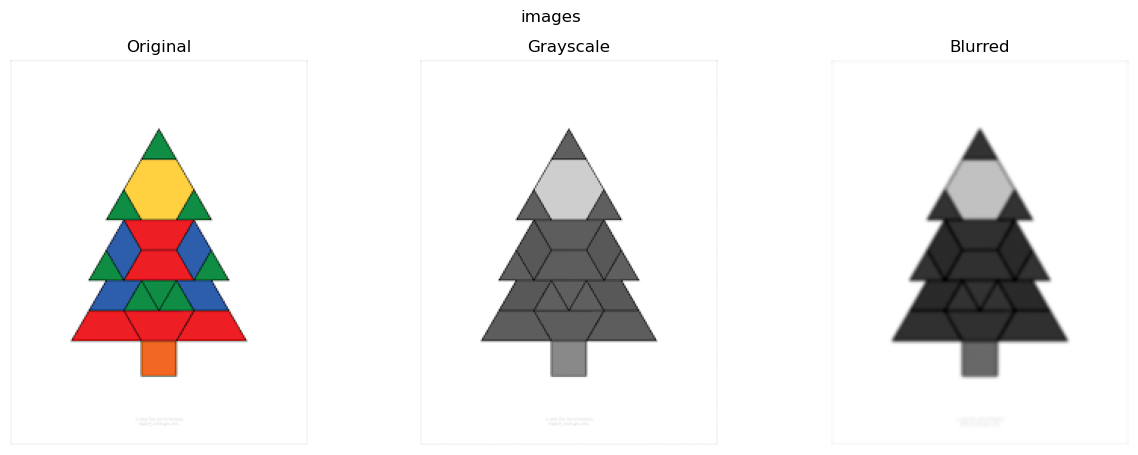

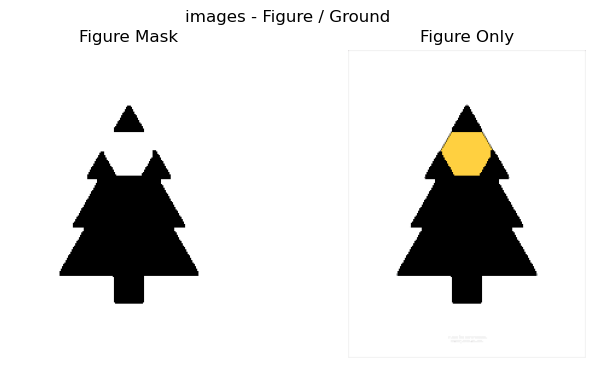

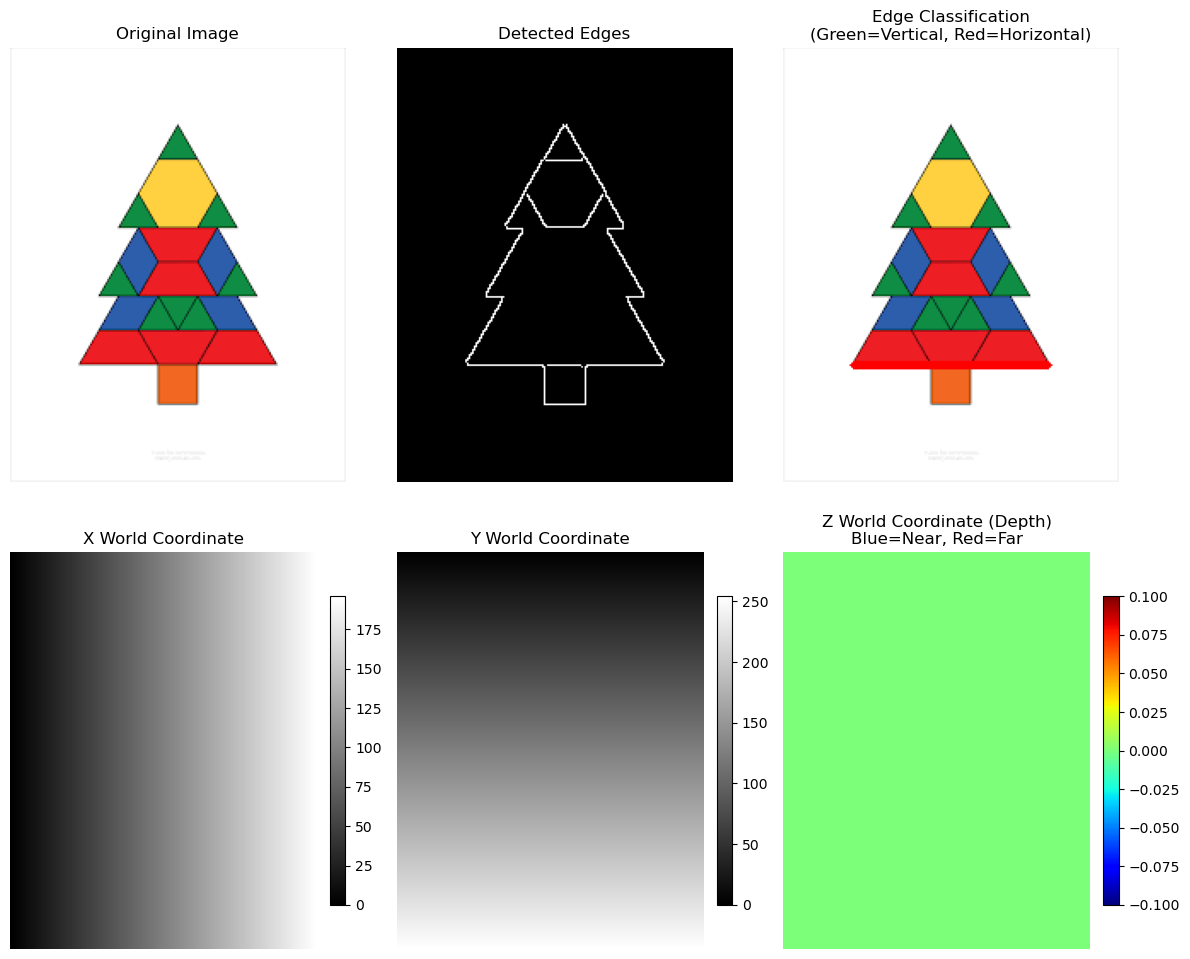

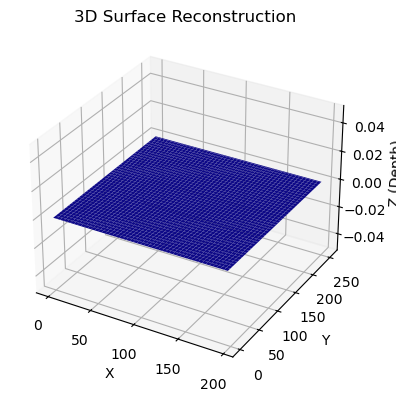

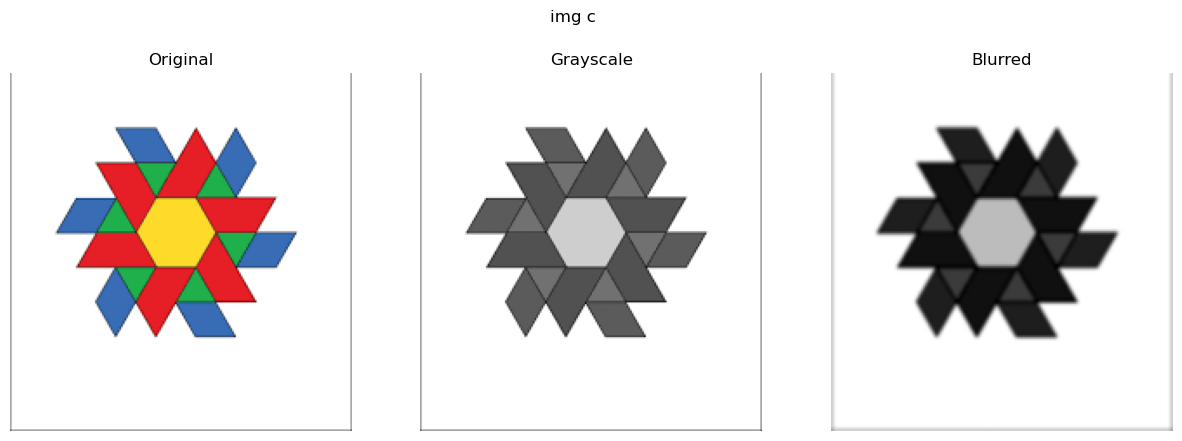

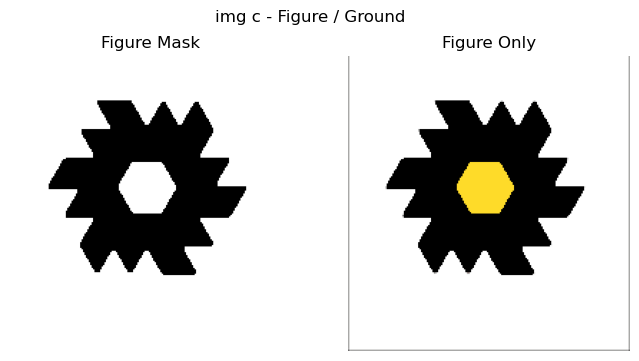

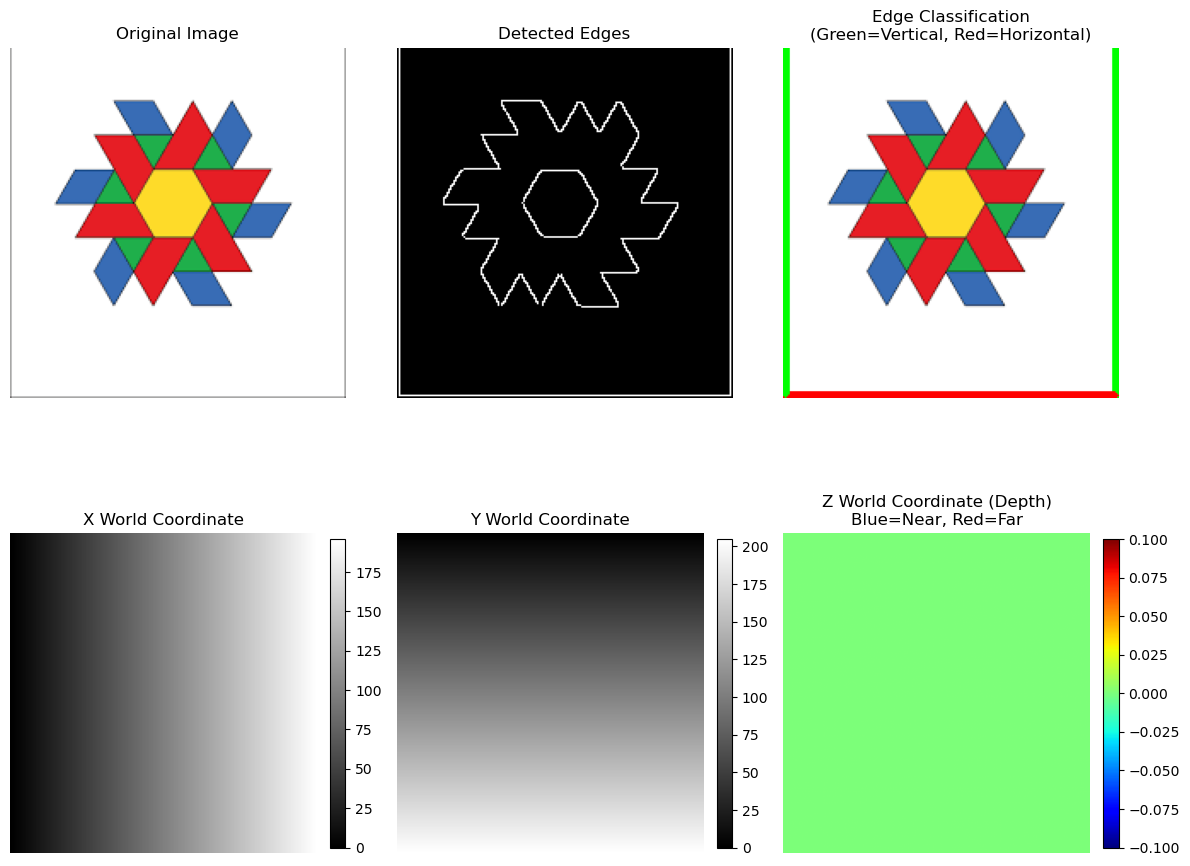

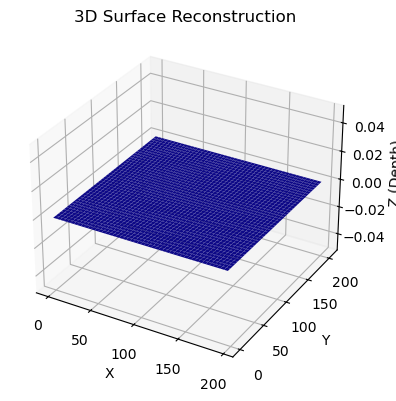

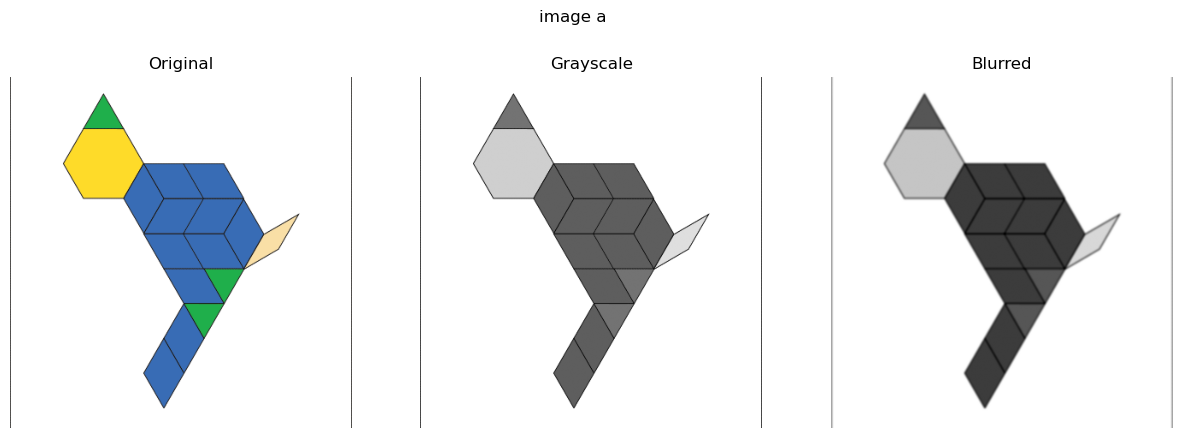

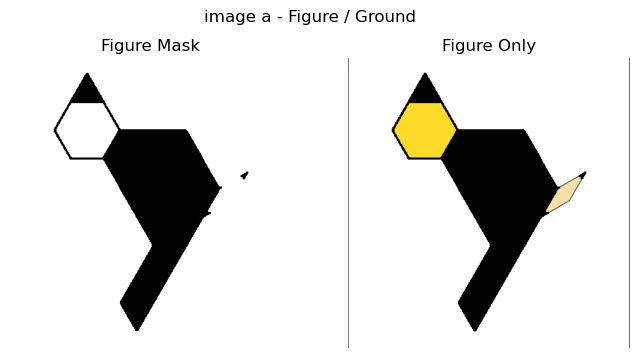

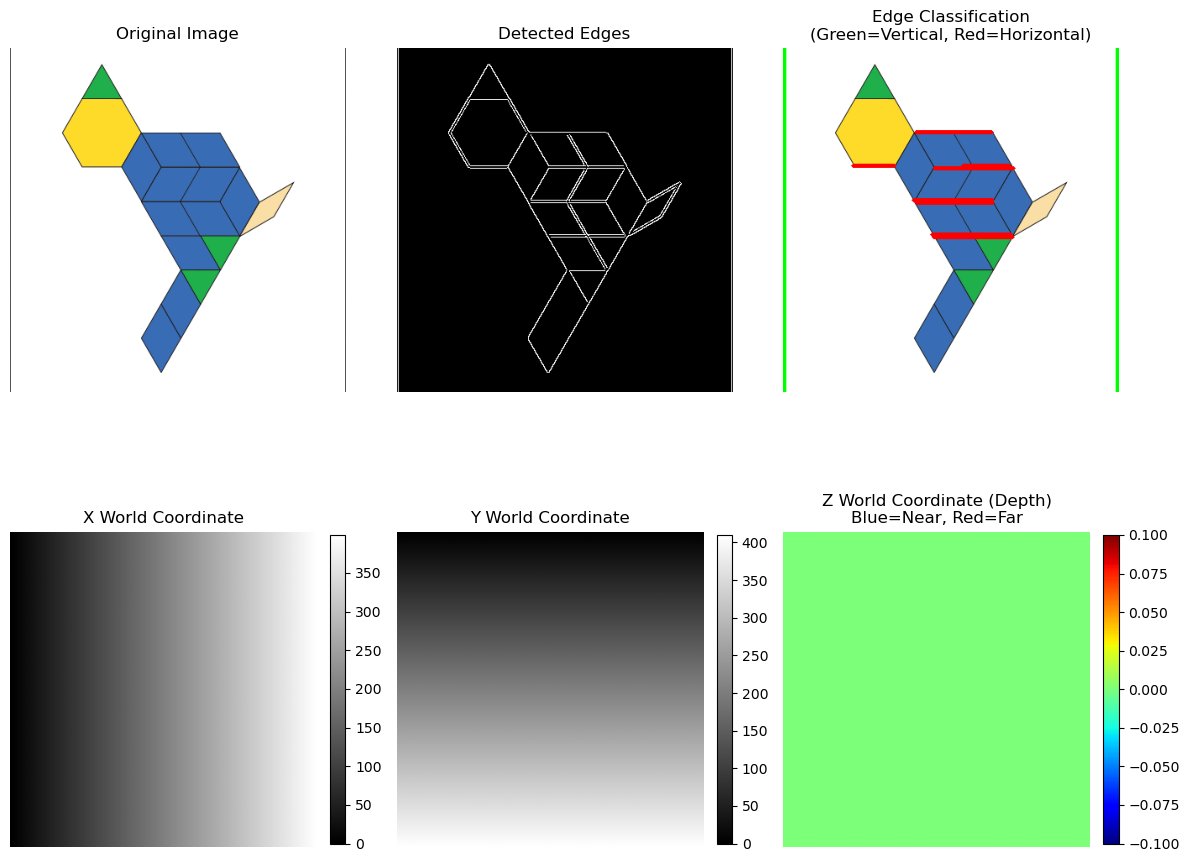

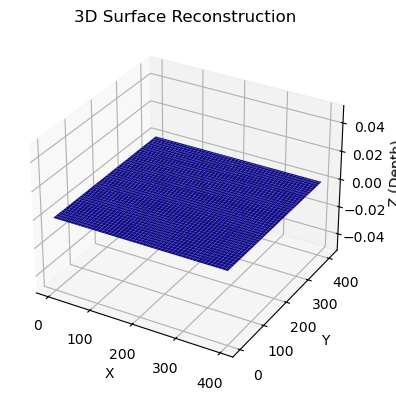

Could not read C:\Users\manasa\Desktop\simpleObjects.png


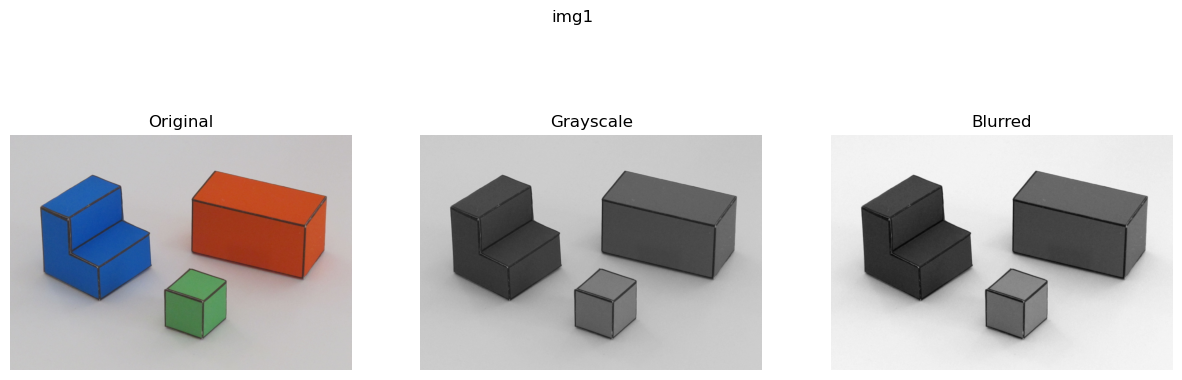

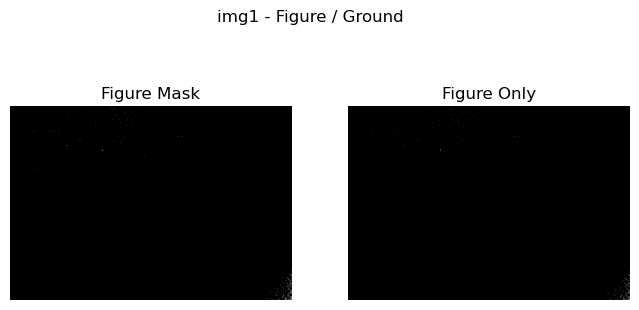

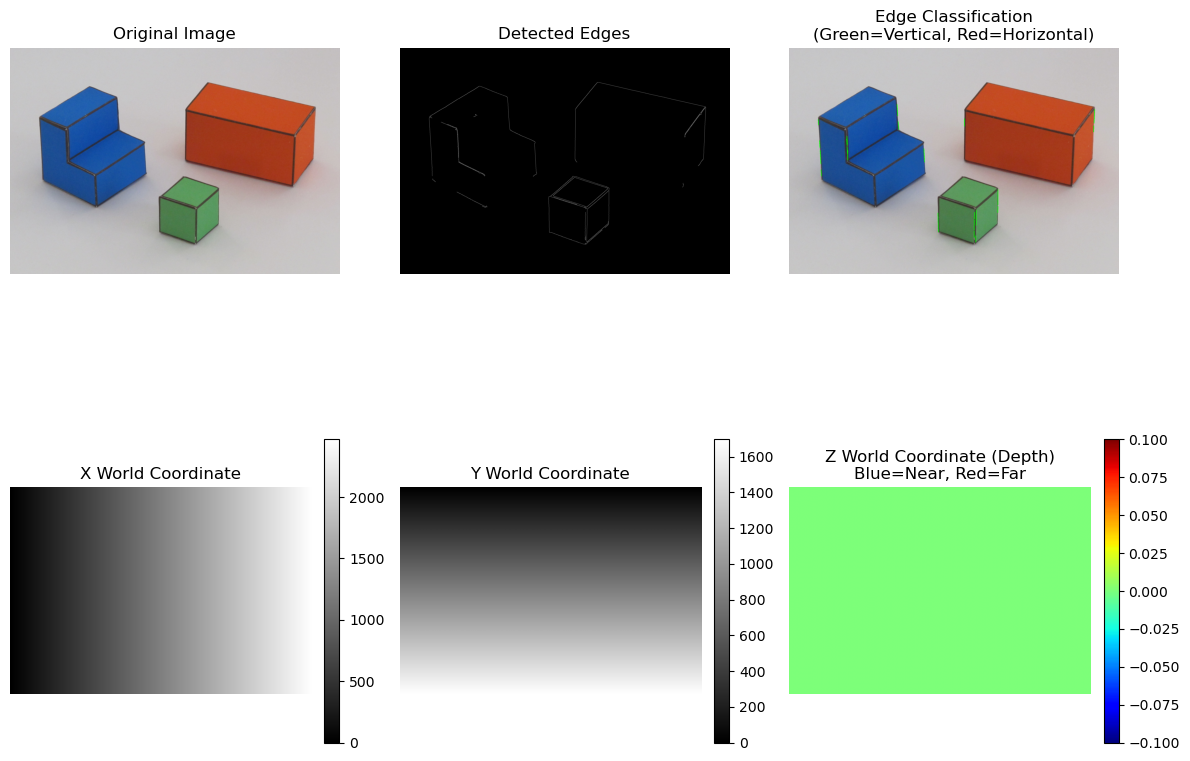

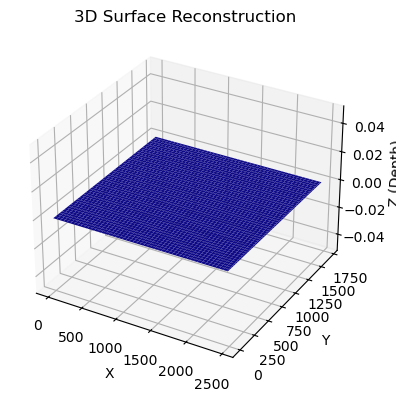

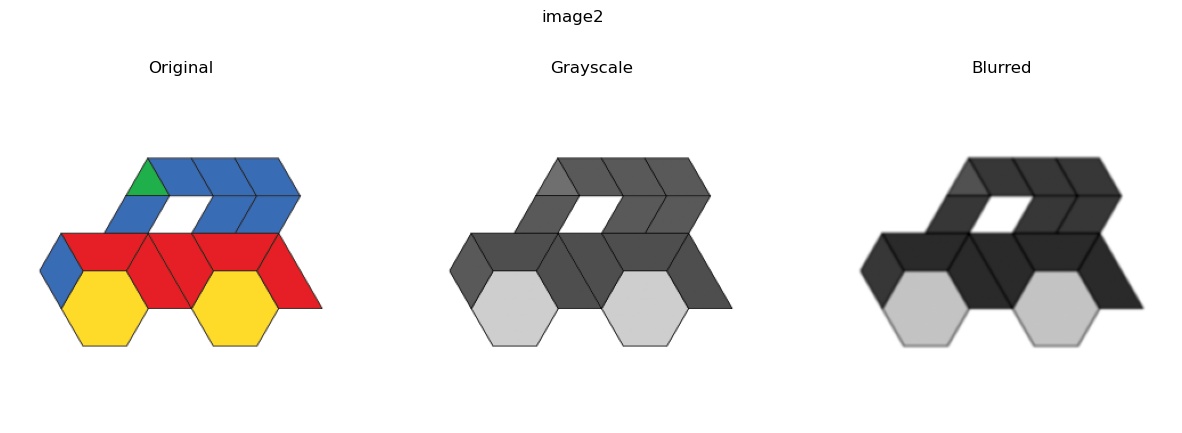

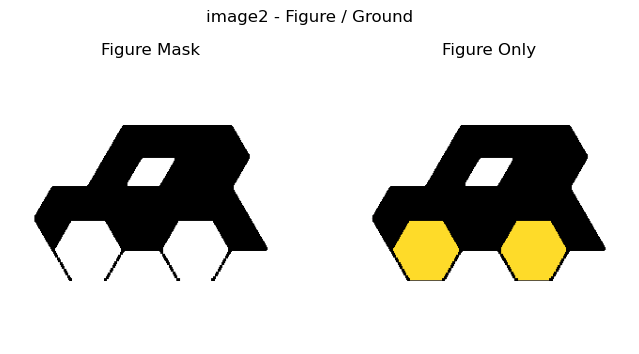

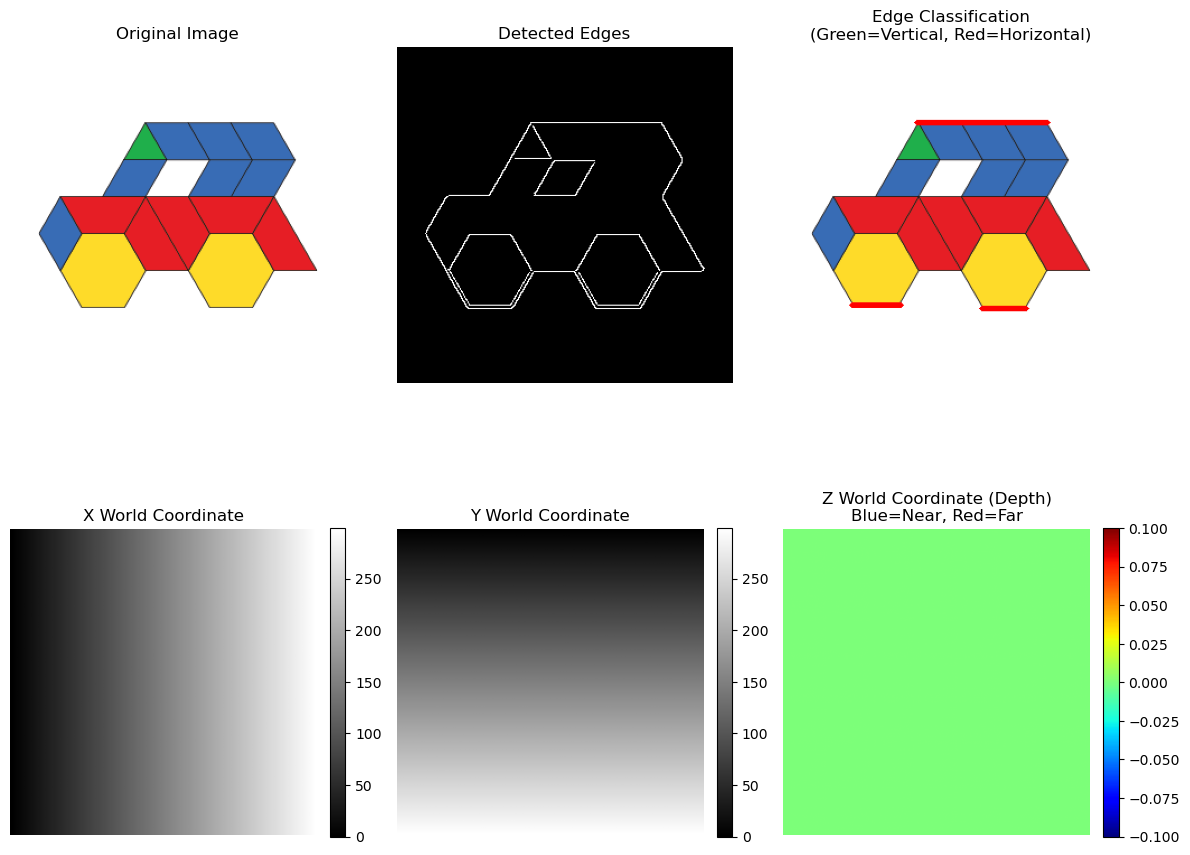

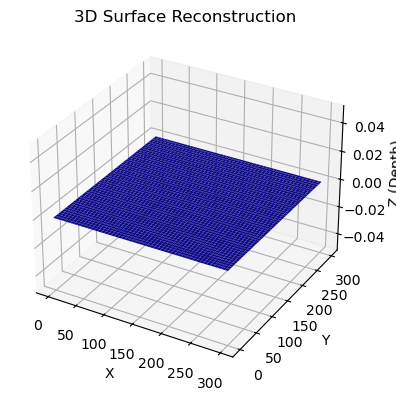

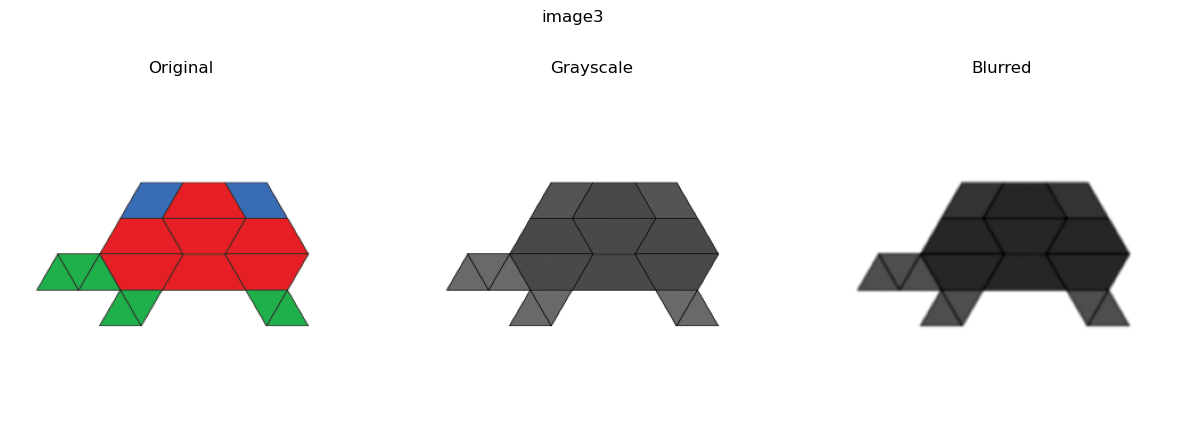

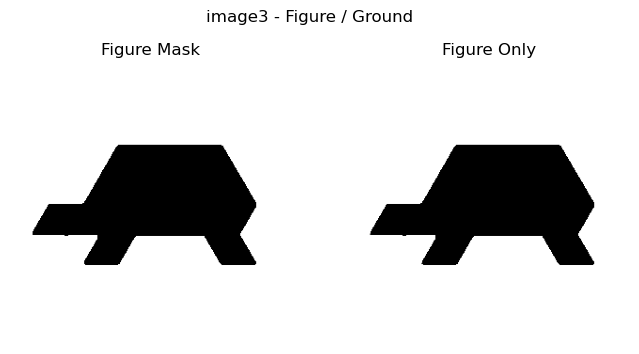

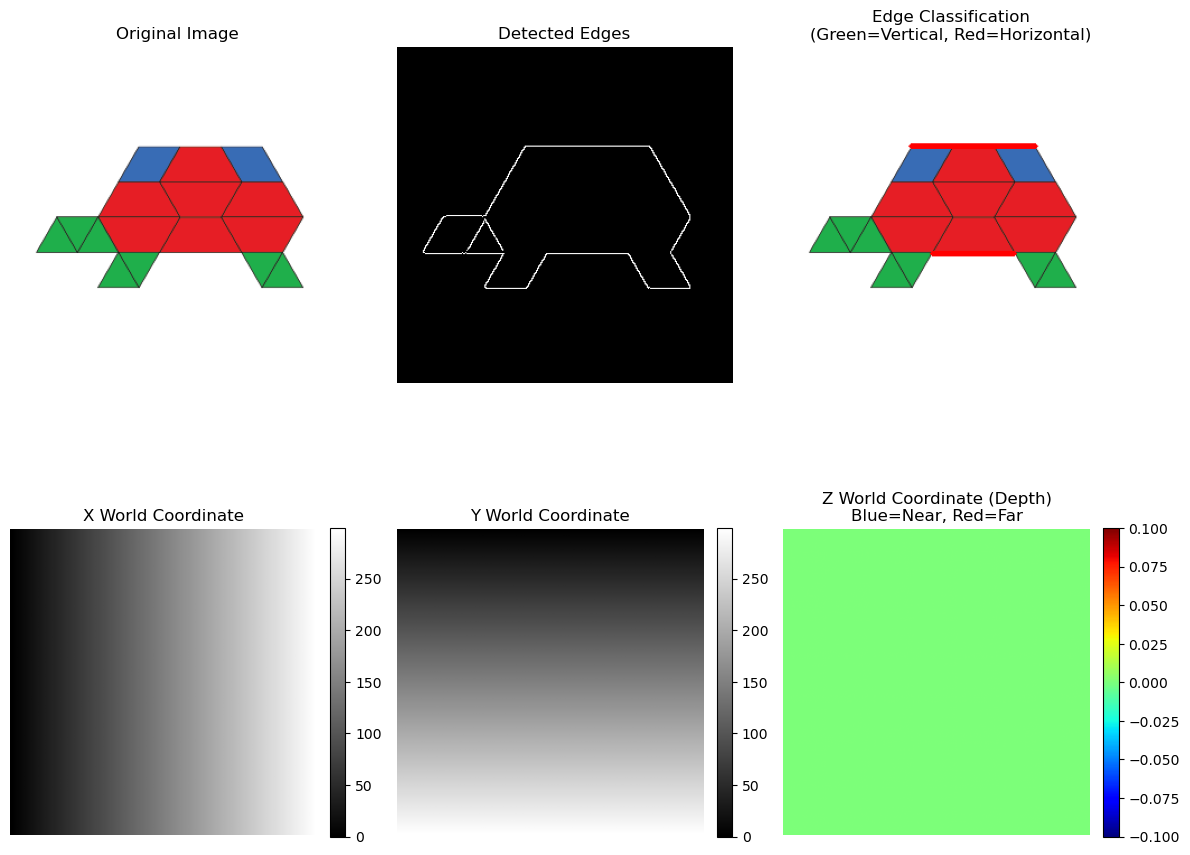

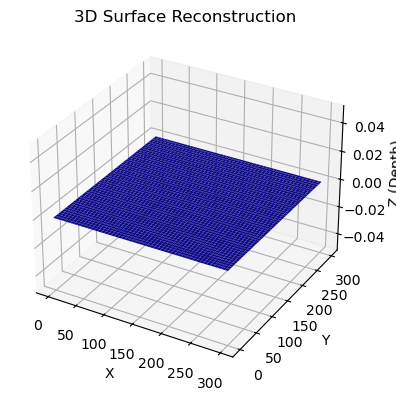

In [25]:
# This loop processes every image in image_filenames and produces:
# 1) Preprocessing results (original, gray, blurred)
# 2) Edge and line classification
# 3) Figure/ground separation
# 4) X, Y, Z world coordinate maps
# 5) 3D surface reconstruction

from mpl_toolkits.mplot3d import Axes3D

# Make sure the results folder exists (outputs will be written here)
os.makedirs('results', exist_ok=True)

for image_filename in image_filenames:

    # ---------- 1. Load image ----------
    # basename is the file name without path or extension, used for output names
    basename = os.path.splitext(os.path.basename(image_filename))[0]

    # Read the image from disk (BGR format as usual in OpenCV)
    img = cv2.imread(image_filename)
    if img is None:
        print(f"Could not read {image_filename}")
        continue  # Skip this file if it cannot be opened

    # ---------- 2. Preprocessing: grayscale + blur ----------
    # Convert to grayscale to simplify processing (single channel)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise before edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # ---------- 3. Edge detection and line classification ----------
    # Canny edge detector gives a binary edge image
    edges = cv2.Canny(blurred, 50, 150)

    # Copy of the original image to draw detected lines on
    img_lines = img.copy()

    # Probabilistic Hough Transform to detect line segments
    lines = cv2.HoughLinesP(
        edges,
        rho=1,
        theta=np.pi / 180,
        threshold=50,
        minLineLength=40,
        maxLineGap=5
    )

    # For each line, compute its angle and color it as vertical or horizontal
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))

            # Vertical lines (angle near 90°) → green
            if 80 <= abs(angle) <= 100:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 3)

            # Horizontal lines (angle near 0° or 180°) → red
            elif abs(angle) <= 10 or abs(angle) >= 170:
                cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 3)

    # ---------- 4. Figure / ground separation ----------
    # Simple global intensity threshold on the blurred grayscale image
    # Pixels brighter than thresh_val are considered figure (blocks)
    thresh_val = 200  # You can tune this value per dataset
    _, fg_mask = cv2.threshold(blurred, thresh_val, 255, cv2.THRESH_BINARY)

    # Morphological opening + closing to remove small noise and fill gaps
    kernel = np.ones((3, 3), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Use the mask to keep only the “figure” (blocks) from the original image
    figure_only = cv2.bitwise_and(img, img, mask=fg_mask)

    # ---------- 5. Save main intermediate results to disk ----------
    cv2.imwrite(f"results/{basename}_original.png", img)
    cv2.imwrite(f"results/{basename}_gray.png", gray)
    cv2.imwrite(f"results/{basename}_blurred.png", blurred)
    cv2.imwrite(f"results/{basename}_edges.png", edges)
    cv2.imwrite(f"results/{basename}_lines.png", img_lines)
    cv2.imwrite(f"results/{basename}_figure_mask.png", fg_mask)
    cv2.imwrite(f"results/{basename}_figure_only.png", figure_only)

    # ---------- 6. Small figure: original / gray / blurred ----------
    # This is useful to quickly show basic preprocessing
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Grayscale")
    plt.imshow(gray, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Blurred")
    plt.imshow(blurred, cmap="gray")
    plt.axis("off")

    plt.suptitle(basename)
    plt.show()

    # ---------- 7. Figure / ground visualization ----------
    # Shows the binary mask and the color image with background removed
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Figure Mask")
    plt.imshow(fg_mask, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Figure Only")
    plt.imshow(cv2.cvtColor(figure_only, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.suptitle(f"{basename} - Figure / Ground")
    plt.show()

    # ---------- 8. Build X, Y, Z world coordinate maps ----------
    # h, w are image height and width; we assume a simple orthographic mapping
    h, w = gray.shape

    # X increases from left to right; same value along each row
    X = np.tile(np.arange(w, dtype=np.float32), (h, 1))

    # Y increases from top to bottom; same value along each column
    Y = np.tile(np.arange(h, dtype=np.float32).reshape(h, 1), (1, w))

    # Z depth map is flat (all zeros) → a plane; you can later modulate depth per block
    Z = np.zeros_like(X, dtype=np.float32)

    # ---------- 9. Big “Simple World” figure (like the textbook) ----------
    fig = plt.figure(figsize=(12, 10))

    # Original image
    ax1 = fig.add_subplot(2, 3, 1)
    ax1.set_title("Original Image")
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.axis("off")

    # Detected edges
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.set_title("Detected Edges")
    ax2.imshow(edges, cmap="gray")
    ax2.axis("off")

    # Edge classification (vertical vs horizontal)
    ax3 = fig.add_subplot(2, 3, 3)
    ax3.set_title("Edge Classification\n(Green=Vertical, Red=Horizontal)")
    ax3.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
    ax3.axis("off")

    # X coordinate map
    ax4 = fig.add_subplot(2, 3, 4)
    im4 = ax4.imshow(X, cmap="gray")
    ax4.set_title("X World Coordinate")
    ax4.axis("off")
    fig.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)

    # Y coordinate map
    ax5 = fig.add_subplot(2, 3, 5)
    im5 = ax5.imshow(Y, cmap="gray")
    ax5.set_title("Y World Coordinate")
    ax5.axis("off")
    fig.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)

    # Z (depth) map
    ax6 = fig.add_subplot(2, 3, 6)
    im6 = ax6.imshow(Z, cmap="jet", vmin=-0.1, vmax=0.1)
    ax6.set_title("Z World Coordinate (Depth)\nBlue=Near, Red=Far")
    ax6.axis("off")
    fig.colorbar(im6, ax=ax6, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

    # ---------- 10. 3D surface reconstruction ----------
    # Plot the world coordinates as a 3D surface (currently a plane)
    fig3d = plt.figure(figsize=(5, 4))
    ax3d = fig3d.add_subplot(1, 1, 1, projection="3d")
    ax3d.plot_surface(X, Y, Z, cmap="plasma", edgecolor="none")
    ax3d.set_title("3D Surface Reconstruction")
    ax3d.set_xlabel("X")
    ax3d.set_ylabel("Y")
    ax3d.set_zlabel("Z (Depth)")
    plt.tight_layout()
    plt.show()
